In [257]:
import pandas as pd
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

In [258]:
df=pd.read_excel('BPR Only .xlsx','Sheet1')

In [259]:
#df.head()

In [260]:
df['Account'].count()

117472

In [261]:
#df.shape

In [262]:
df.dropna(inplace=True)

In [263]:
#df.shape

In [264]:
#df['Account'].value_counts()

In [265]:
df=df[df.Account == 115806]

In [266]:
#df.shape

In [267]:
#df.head()

In [268]:
df.drop(columns=['    BusA','CCAr','Zone','Bran'],inplace=True)

In [269]:
#df.head(5)

In [270]:
df.drop(columns=['Reference','Account','DocumentNo','Doc/Chq dt','Year','Clrng doc.'],inplace=True)

In [271]:
#df.shape

In [272]:
df.drop(columns='Customer Name',inplace=True)

In [273]:
#df.shape

In [274]:
#df.head()

In [275]:
df['Status']=df['Status'].astype('category')

In [276]:
df["Status"] = df["Status"].cat.codes

In [277]:
#df.head()

In [278]:
#df['Status'].value_counts()

In [279]:
df['PayT'] = df['PayT'].map(lambda x: int(x.lstrip('ZZ')))


In [280]:
#df

In [281]:
df['Pstng Date']=df['Pstng Date'].dt.strftime("%Y%m%d").astype(str)
df['Net Due Dt']=df['Net Due Dt'].dt.strftime("%Y%m%d").astype(str)
df['Clearing']=df['Clearing'].dt.strftime("%Y%m%d").astype(str)

In [282]:
#df

In [284]:
df = df.reset_index()
df.drop(columns='index',inplace=True)
df.to_excel('Reduced.xlsx')

In [285]:
sums=0
arr=[]
for i in range(len(df)):
    if(df['Status'][i]==1):
        sums=df['  Local Crcy Amt'][i]
        arr.append(sums)
    else:
        arr.append(0)
    
df['Sum of Delay']=arr

In [286]:
df['Sum of Delay']

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
5       0.000000
6       0.000000
7       0.000000
8       0.000000
9       0.000000
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15      0.000000
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21      0.000000
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26      0.000000
27      0.158651
28      0.143911
29      0.136224
          ...   
3624    0.149750
3625    0.150504
3626    0.150667
3627    0.151493
3628    0.152742
3629    0.154740
3630    0.156213
3631    0.156780
3632    0.157949
3633    0.241375
3634    0.165301
3635    0.171330
3636    0.141827
3637    0.142035
3638    0.190018
3639    0.190351
3640    0.144564
3641    0.198283
3642    0.151423
3643    0.151866
3644    0.164303
3645    0.132634
3646    0.168795
3647    0.169221
3648    0.140275
3649    0.176805
3650    0.144564
3651    0.1533

In [287]:
sums=0
count=0
sums_day=0
sums_day_count=0
sums_day_start=0
sums_day_count_start=0
for i in range(len(df)):
    if(df['Pstng Date'][i][:4]=='2018'):
        if(df['Pstng Date'][i][4:6]=='11'):
                sums+=df['Sum of Delay'][i]
                count=count+1
                if(int(df['Pstng Date'][i][6:])>20):
                    sums_day+=df['Sum of Delay'][i]
                    sums_day_count+=1
                if(int(df['Pstng Date'][i][6:])<20):
                    sums_day_start+=df['Sum of Delay'][i]
                    sums_day_count_start+=1

avg_delay_monthly=sums/count
avg_delay_windows=sums_day/sums_day_count
avg_delay_start=sums_day_start/sums_day_count_start
print(avg_delay_monthly,avg_delay_windows,avg_delay_start)


0.07924045494983277 0.11345508909615389 0.05834104866315789


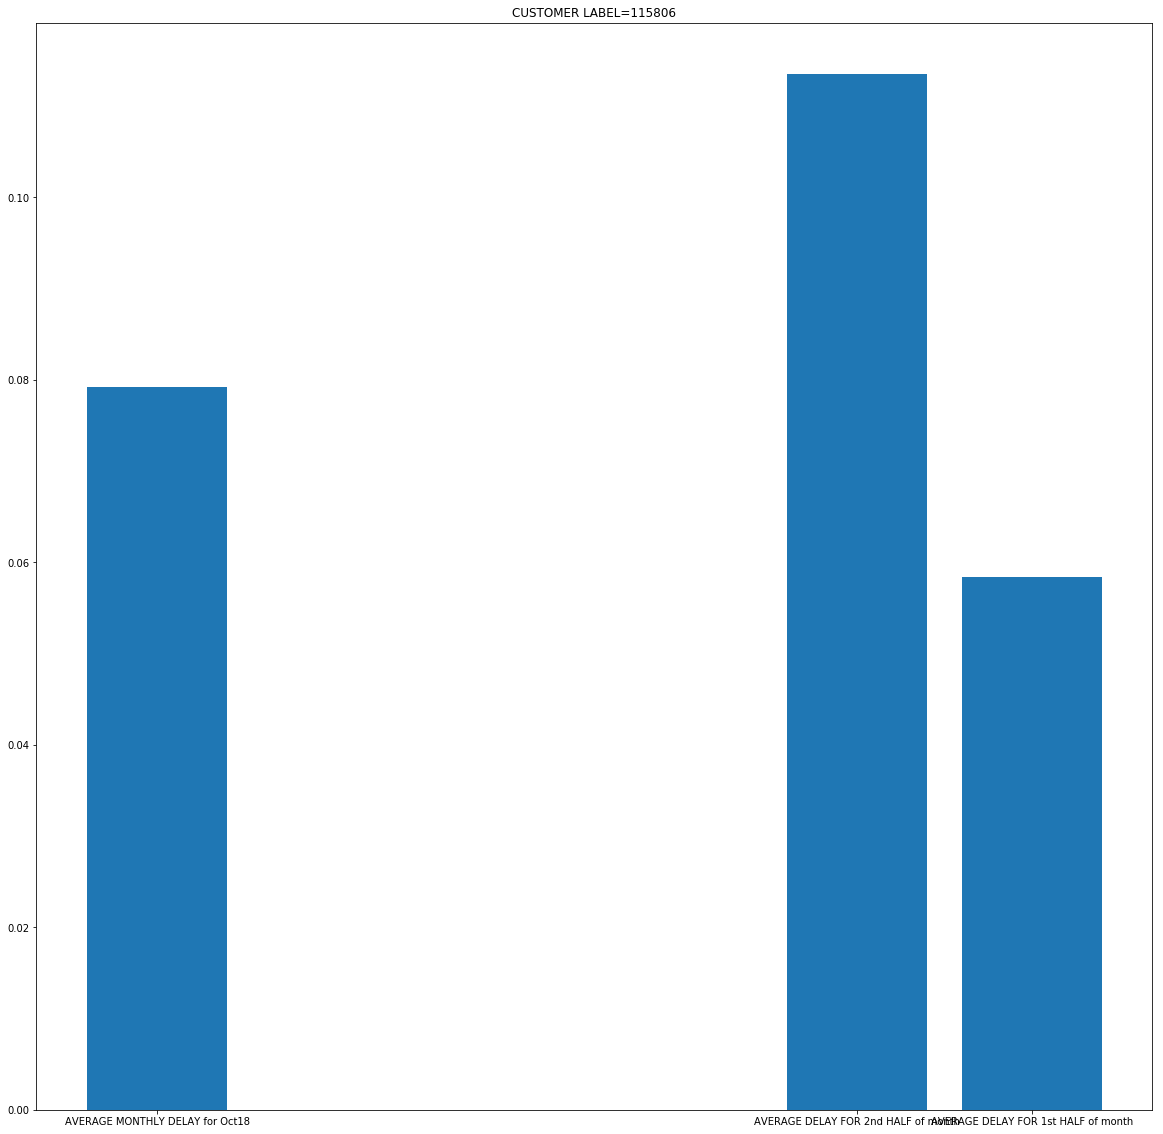

In [294]:
#Histogram Plot
fig = plt.figure(figsize=(20, 20))
plt.bar([1, 5, 6],[avg_delay_monthly,avg_delay_windows,avg_delay_start], tick_label=['AVERAGE MONTHLY DELAY for Oct18','AVERAGE DELAY FOR 2nd HALF of month','AVERAGE DELAY FOR 1st HALF of month'])
plt.title('CUSTOMER LABEL=115806')
plt.show()


In [295]:
plt.savefig('Average_Delay_Plot.jpeg')

<Figure size 432x288 with 0 Axes>